In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Load the dataset
file_path = "BostonHousing.csv"  # Update with your file path if needed
boston_df = pd.read_csv(file_path)

In [5]:
# Display first few rows
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
# Display dataset information
display(boston_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


None

In [52]:
print(boston_df.isnull().sum())  # Check missing values

crim           0
zn             0
indus          0
chas           0
nox            0
rm             0
age            0
dis            0
rad            0
tax            0
ptratio        0
b              0
lstat          0
medv           0
luxury_home    0
log_crim       0
dtype: int64


In [11]:
# Summary statistics
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


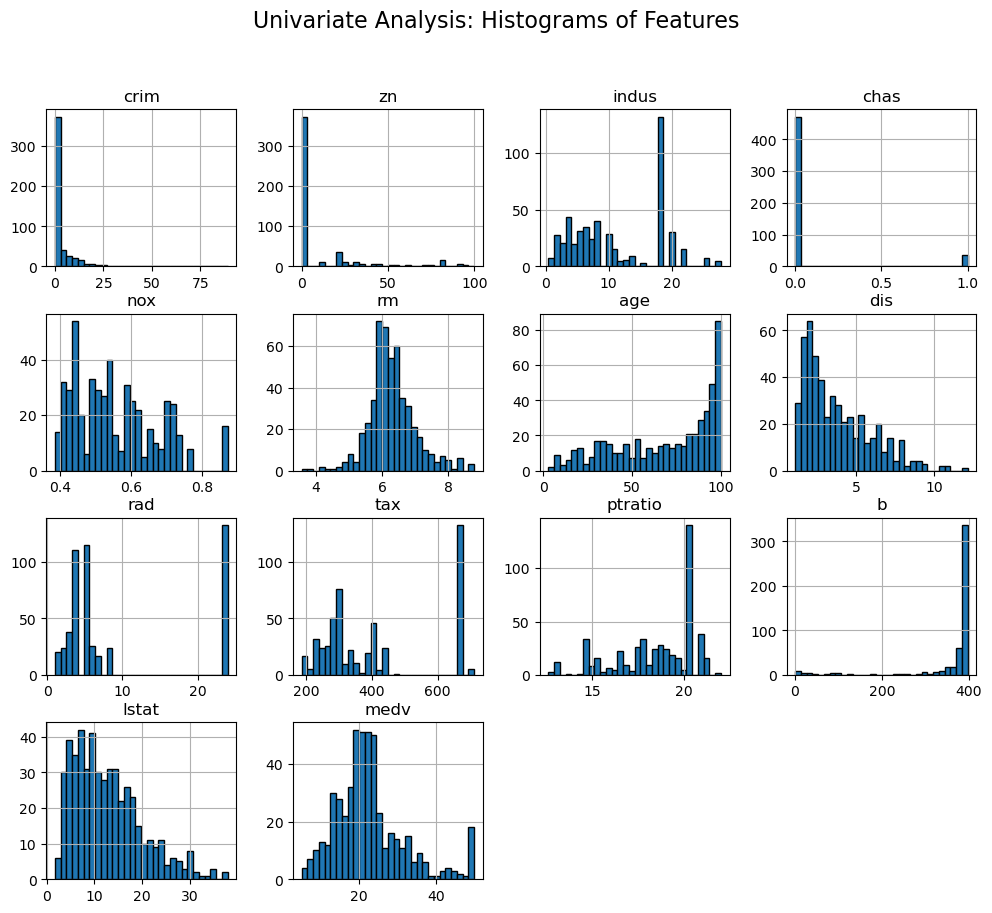

In [13]:
# Univariate Analysis

# Plot histograms for all numerical features
boston_df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Univariate Analysis: Histograms of Features", fontsize=16)
plt.show()

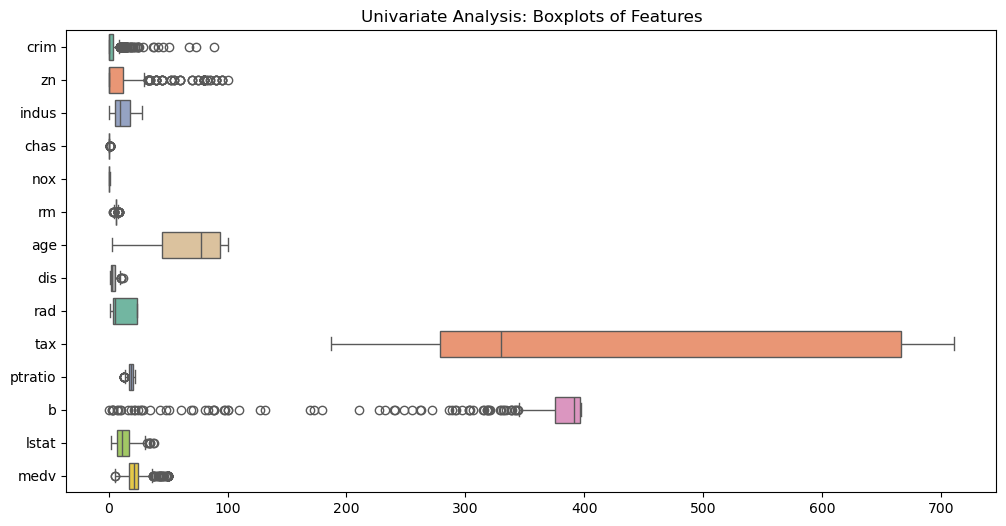

In [15]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=boston_df, orient='h', palette='Set2')
plt.title("Univariate Analysis: Boxplots of Features")
plt.show()

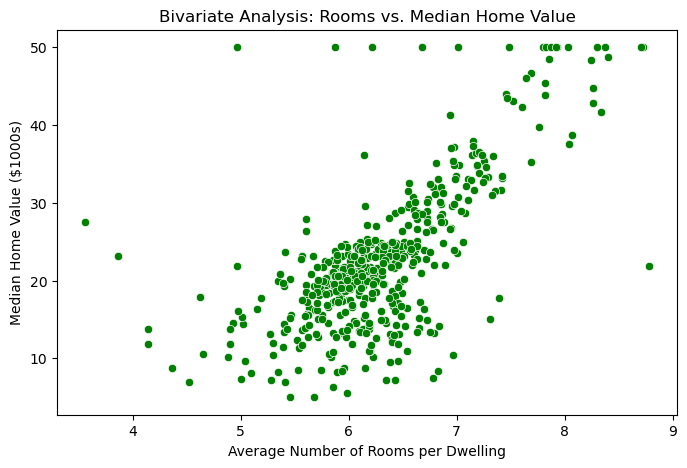

In [19]:
# Bivariate Analysis

# Scatter Plots
plt.figure(figsize=(8, 5))
sns.scatterplot(x=boston_df['rm'], y=boston_df['medv'], color='green')
plt.title('Bivariate Analysis: Rooms vs. Median Home Value')
plt.xlabel('Average Number of Rooms per Dwelling')
plt.ylabel('Median Home Value ($1000s)')
plt.show()

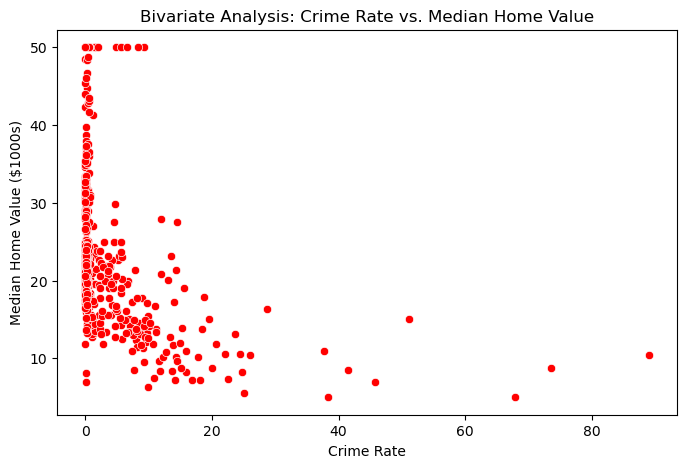

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=boston_df['crim'], y=boston_df['medv'], color='red')
plt.title('Bivariate Analysis: Crime Rate vs. Median Home Value')
plt.xlabel('Crime Rate')
plt.ylabel('Median Home Value ($1000s)')
plt.show()

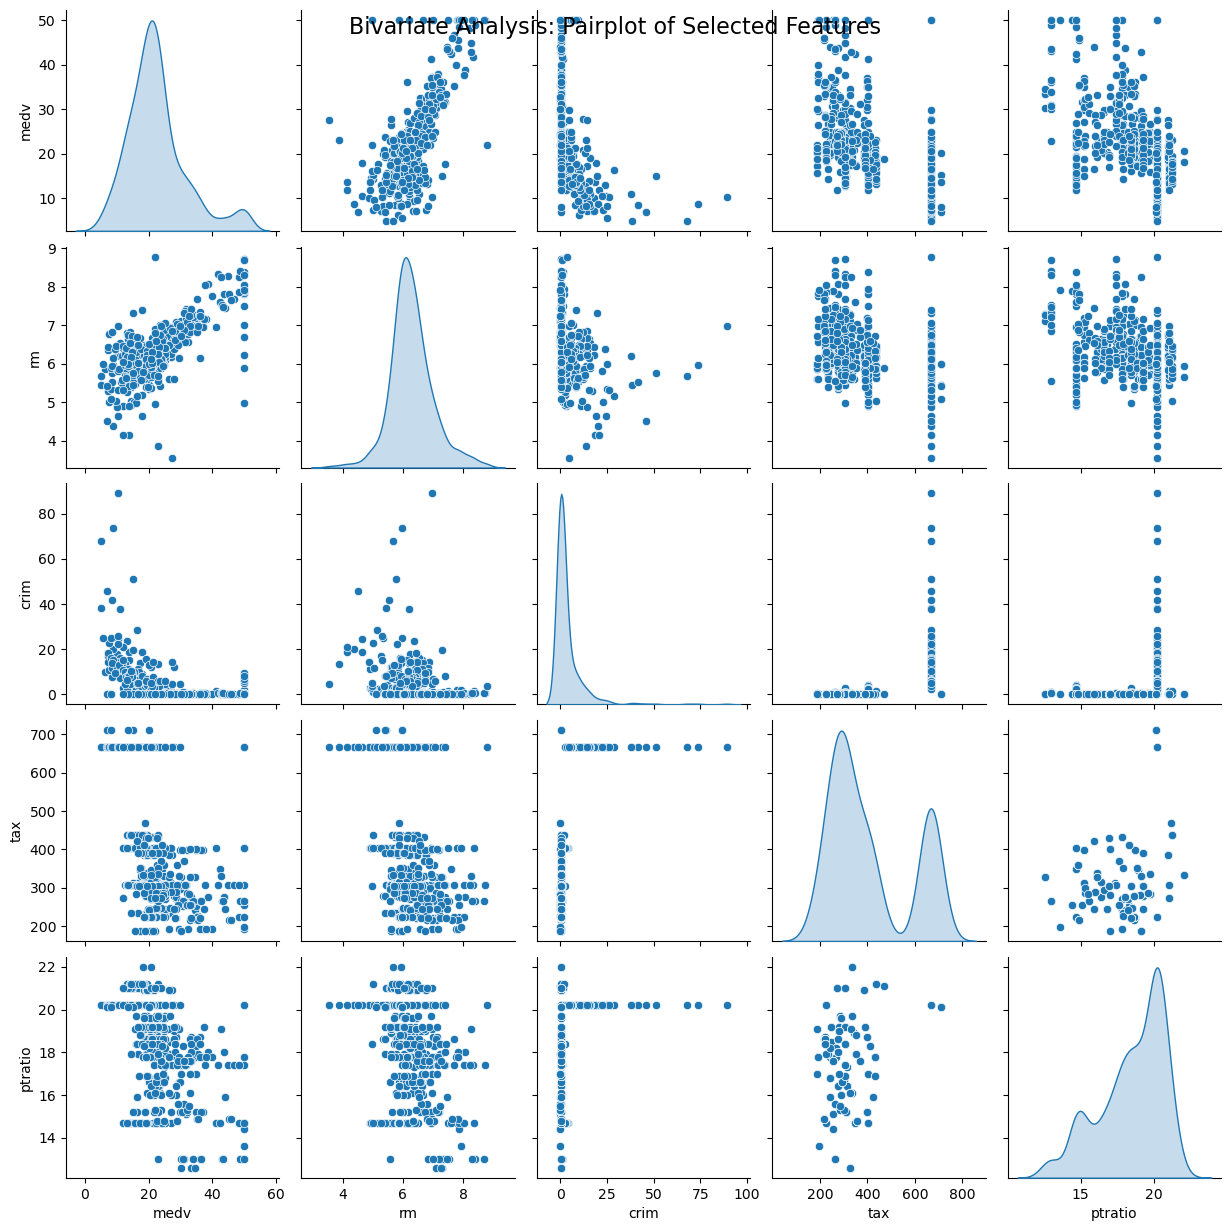

In [23]:
# Pairplot for feature relationships
sns.pairplot(boston_df[['medv', 'rm', 'crim', 'tax', 'ptratio']], diag_kind='kde')
plt.suptitle("Bivariate Analysis: Pairplot of Selected Features", fontsize=16)
plt.show()


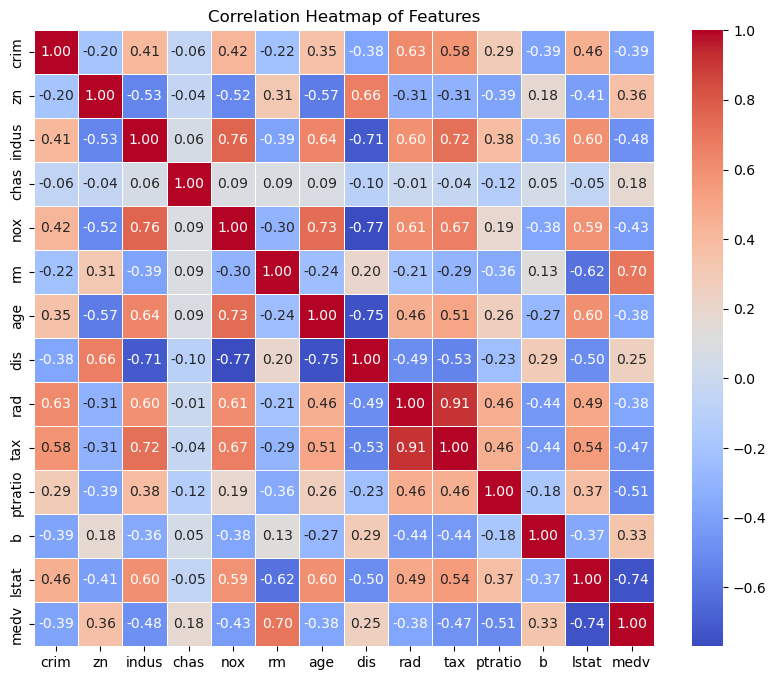

In [25]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = boston_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

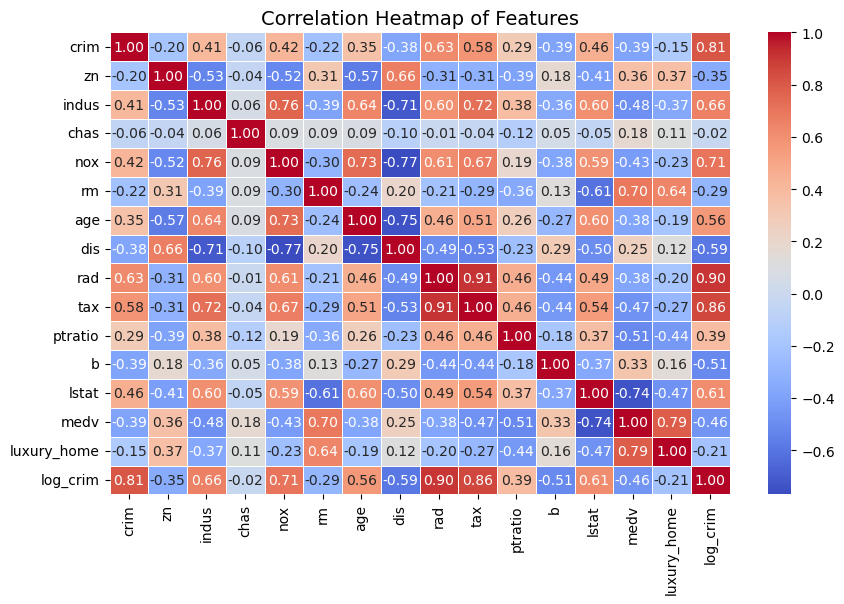

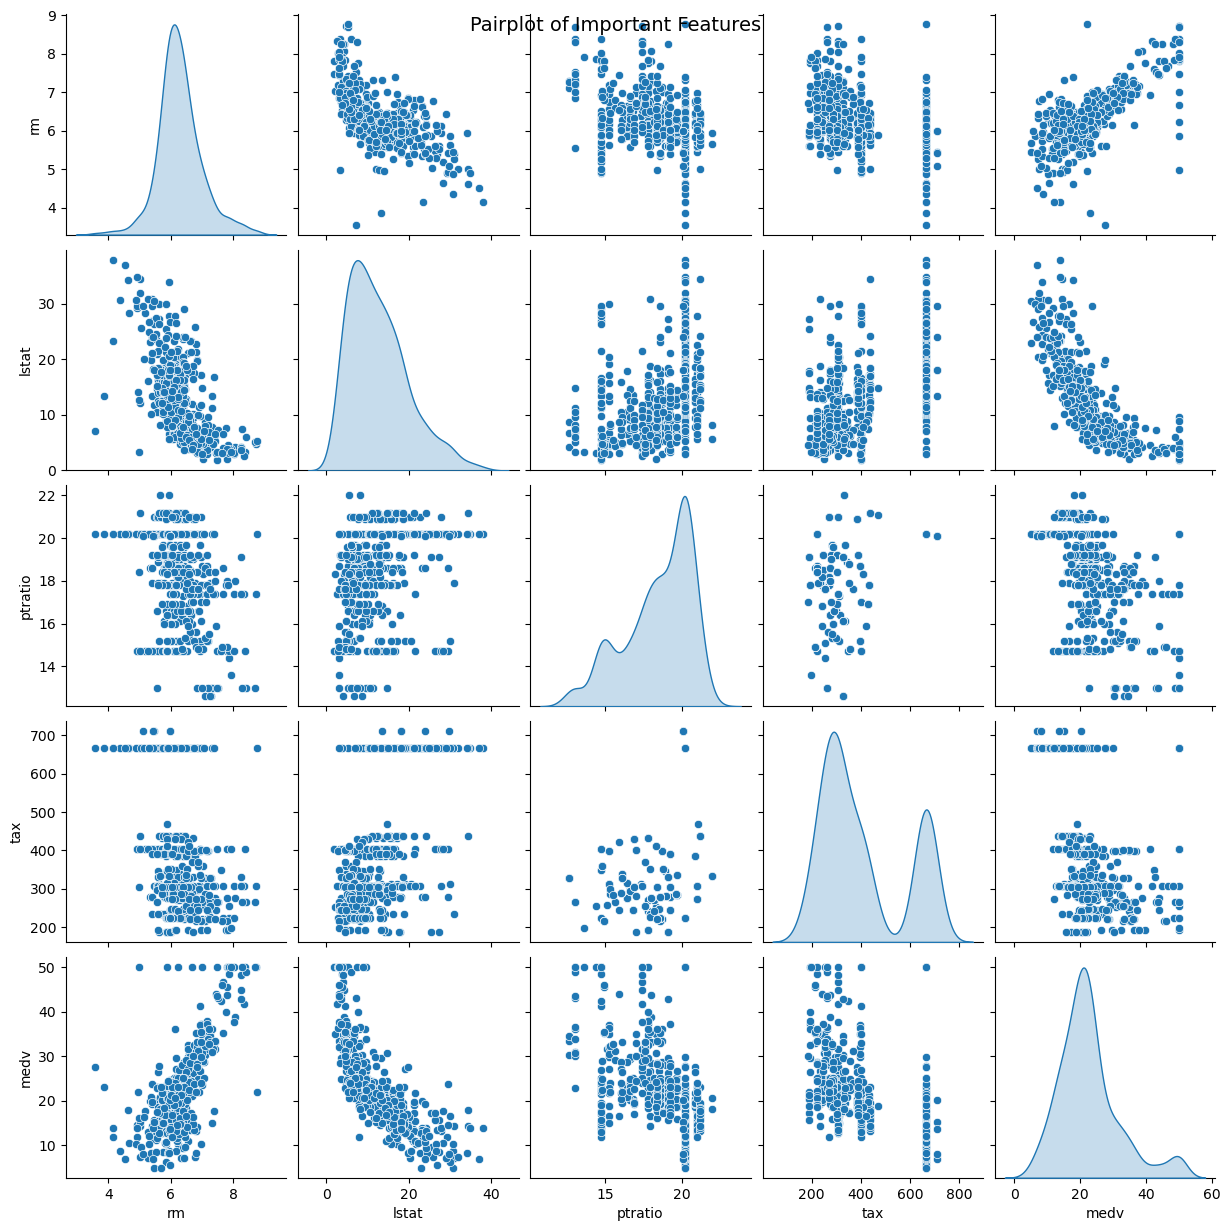

In [77]:

# Multivariate Analysis

# Correlation Heatmap (Multivariate Analysis)
plt.figure(figsize=(10, 6))
sns.heatmap(boston_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=14)
plt.show()

# Pairplot with Limited Important Features
important_features = ['rm', 'lstat', 'ptratio', 'tax', 'medv']
sns.pairplot(boston_df[important_features], diag_kind='kde')
plt.suptitle("Pairplot of Important Features", fontsize=14)
plt.show()


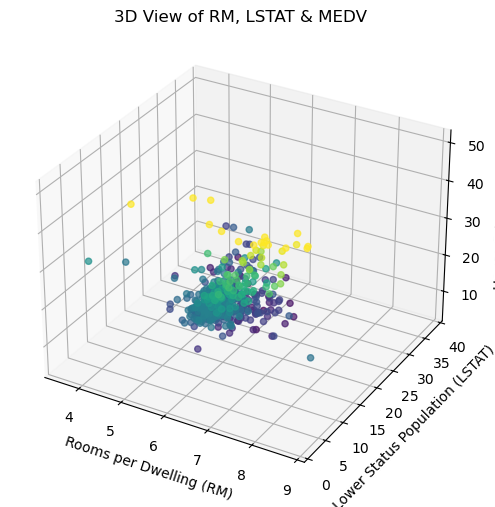

In [82]:
# 3. 3D Scatter Plot (Example: RM, LSTAT, and MEDV)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(boston_df["rm"], boston_df["lstat"], boston_df["medv"], c=boston_df["medv"], cmap='viridis', alpha=0.7)
ax.set_xlabel("Rooms per Dwelling (RM)")
ax.set_ylabel("Lower Status Population (LSTAT)")
ax.set_zlabel("House Price (MEDV)")
ax.set_title("3D View of RM, LSTAT & MEDV")
plt.show()

In [31]:
# Feature Engineering

# Create a new binary variable for high-value homes (medv > 30 considered luxury homes)
boston_df['luxury_home'] = (boston_df['medv'] > 30).astype(int)
print("New column 'luxury_home' added.")

New column 'luxury_home' added.


In [33]:
# Log transformation for crime rate to reduce skewness
boston_df['log_crim'] = np.log1p(boston_df['crim'])
print("Log transformation applied to 'crim'.")


Log transformation applied to 'crim'.


In [35]:
# Display first few rows after feature engineering
boston_df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,luxury_home,log_crim
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,0.006300
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,0.026944
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,0.026924
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,0.031857
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,0.066770


In [37]:
# Insights Extraction

# Identify key relationships and patterns
print("Insights from the data:")
print("1. Higher crime rates (crim) tend to lower home values (medv).")
print("2. Homes with more rooms (rm) generally have higher prices.")
print("3. Neighborhoods with higher student-teacher ratios (ptratio) have lower home values.")
print("4. Properties near the Charles River (chas=1) tend to have slightly higher prices.")
print("5. Luxury homes (medv > 30) are concentrated in areas with low crime and better living conditions.")


Insights from the data:
1. Higher crime rates (crim) tend to lower home values (medv).
2. Homes with more rooms (rm) generally have higher prices.
3. Neighborhoods with higher student-teacher ratios (ptratio) have lower home values.
4. Properties near the Charles River (chas=1) tend to have slightly higher prices.
5. Luxury homes (medv > 30) are concentrated in areas with low crime and better living conditions.
